In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
pip install docx2txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv("https://usc-bootcamp-yelpreview-text-analysis.s3.us-east-2.amazonaws.com/reviews.csv", encoding ="latin-1")

In [7]:
df.head()

,reviews,rating,review_count
0,Panda Express was on point tonight! I ordered ...,5 star rating,62
1,The dude and I came to this Panda Express arou...,5 star rating,62
2,"I ordered 5 total plates , fried rice , chow m...",1 star rating,62
3,I always order Panda Express from here and the...,3 star rating,62
4,"I've never had a bad experience here, I don't ...",4 star rating,62


In [26]:
print(comment_words[0])

panda


In [12]:
df['raitngs'] = df['rating'].map(lambda x:int(x[0]))

In [13]:
df['status']= df['ratings'].map(lambda x:1 if x<3 else (2 if x<4 else 3))

In [16]:
df

,reviews,rating,review_count,ratings,raitngs,status
0,Panda Express was on point tonight! I ordered ...,5 star rating,62,5,5,3
1,The dude and I came to this Panda Express arou...,5 star rating,62,5,5,3
2,"I ordered 5 total plates , fried rice , chow m...",1 star rating,62,1,1,1
3,I always order Panda Express from here and the...,3 star rating,62,3,3,2
4,"I've never had a bad experience here, I don't ...",4 star rating,62,4,4,3
...,...,...,...,...,...,...
19516,Food Was Alright... Upset They Dont Have Chang...,1 star rating,42,1,1,1
19517,I just had a party for 30 people and I was so ...,5 star rating,42,5,5,3
19518,These people said they were open at midnight a...,1 star rating,42,1,1,1
19519,"Its PandEx! Chow Mien, Kung Pau and Orange Chi...",4 star rating,42,4,4,3


In [35]:
new_df1= df[df['status'] == 1]
new_df1

,reviews,rating,review_count,ratings,raitngs,status
2,"I ordered 5 total plates , fried rice , chow m...",1 star rating,62,1,1,1
6,The family meal deal for $20 is a joke! What t...,1 star rating,62,1,1,1
7,Quality has severely declined since covid 19 b...,2 star rating,62,2,2,1
8,Paid for a bowl and entree. There like 1/2 cup...,1 star rating,62,1,1,1
9,Order a bowl with chow mein and shrimp and the...,1 star rating,62,1,1,1
...,...,...,...,...,...,...
19509,Just went and ordered 4 meals when we got to t...,1 star rating,42,1,1,1
19514,How do I start this.. um the fried rice was ei...,1 star rating,42,1,1,1
19516,Food Was Alright... Upset They Dont Have Chang...,1 star rating,42,1,1,1
19518,These people said they were open at midnight a...,1 star rating,42,1,1,1


In [77]:
comment_words = " "
stop_words =set(STOPWORDS)
stop_words.update(["panda","express","food","one","order"])

In [78]:
for i in new_df1.head().reviews: 
    #print(i)
    i = str(i) 
    separate = i.split(" ")
    #print(separate)
    for word in separate: 
        if word not in stop_words:
            comment_words += " " + word.lower()

In [79]:
#path = "./map.png"
#mask = np.array(Image.open(path))
final_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', #mask = mask,
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)

In [80]:
from PIL import Image
import numpy as np

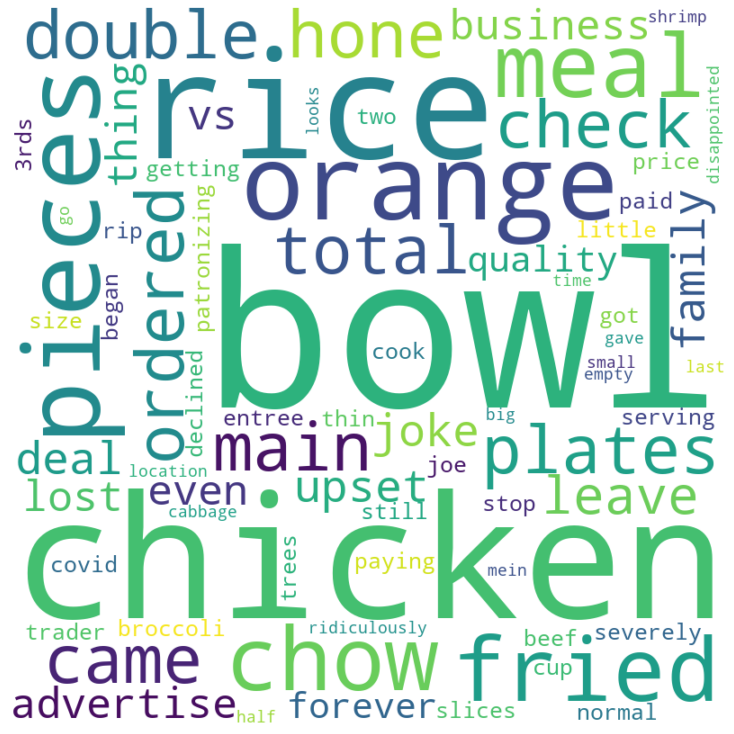

In [81]:
plt.figure(figsize=[10, 10])
plt.imshow(final_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()


In [82]:
new_df2= df[df['status'] == 2]
new_df2

,reviews,rating,review_count,ratings,raitngs,status
3,I always order Panda Express from here and the...,3 star rating,62,3,3,2
22,"Came here on a Thursday night around 5, no lin...",3 star rating,27,3,3,2
38,I was in a bind last night before the 7pm movi...,3 star rating,27,3,3,2
60,I'm here 1-2 times a week maeby 1 out of every...,3 star rating,42,3,3,2
67,Not the best chinese restaurant I have been to...,3 star rating,42,3,3,2
...,...,...,...,...,...,...
19476,The Service is good.but the food not so good.I...,3 star rating,21,3,3,2
19477,Clean friendly and my favorite is the walnut s...,3 star rating,21,3,3,2
19483,Noelle's Yelp Notebook 2019This location of Pa...,3 star rating,92,3,3,2
19491,"Firecracker shrimp with Fried rice. Sadly, I p...",3 star rating,92,3,3,2


In [83]:
comment_words = " "
stop_words =set(STOPWORDS)
stop_words.update(["panda","express","food","one","order"])
for i in new_df2.head().reviews: 
    #print(i)
    i = str(i) 
    separate = i.split(" ")
    #print(separate)
    for word in separate: 
        if word not in stop_words:
            comment_words += " " + word.lower()

In [84]:
#path = "./map.png"
#mask = np.array(Image.open(path))
final_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black', #mask = mask,
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)

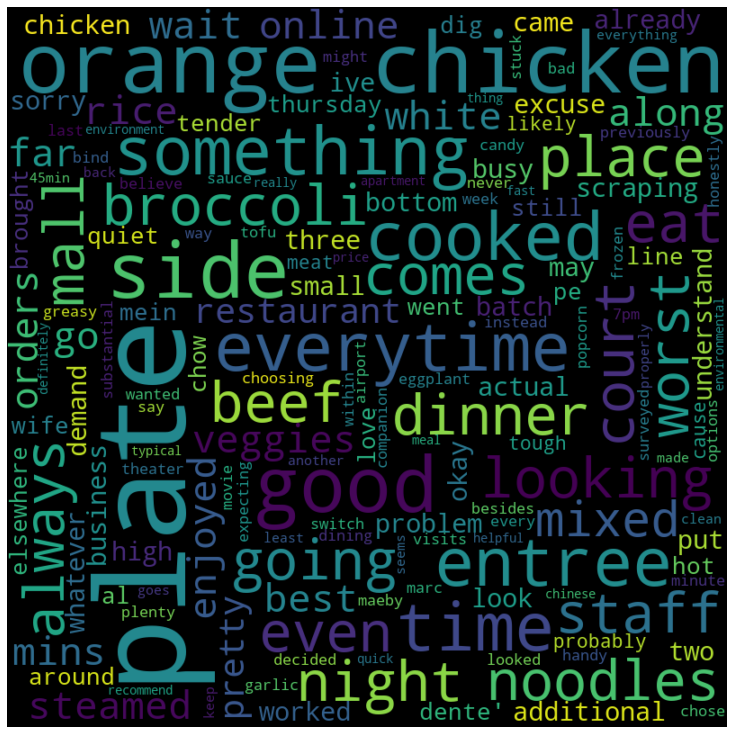

In [85]:
from PIL import Image
import numpy as np
plt.figure(figsize=[10, 10])
plt.imshow(final_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [52]:
new_df3= df[df['status'] == 3]
new_df3

,reviews,rating,review_count,ratings,raitngs,status
0,Panda Express was on point tonight! I ordered ...,5 star rating,62,5,5,3
1,The dude and I came to this Panda Express arou...,5 star rating,62,5,5,3
4,"I've never had a bad experience here, I don't ...",4 star rating,62,4,4,3
5,Decided to try Panda Expess one more time.Corp...,5 star rating,62,5,5,3
14,Okay..so Panda is what it is..an ultra America...,4 star rating,62,4,4,3
...,...,...,...,...,...,...
19512,Just passing through the area and was looking ...,4 star rating,42,4,4,3
19513,Went in for a quick lunch and man the lines we...,5 star rating,42,5,5,3
19515,This place is located adjacent to the Morongo ...,4 star rating,42,4,4,3
19517,I just had a party for 30 people and I was so ...,5 star rating,42,5,5,3


In [66]:
comment_words = " "
stop_words =set(STOPWORDS)
stop_words.update(["panda","express","food","one","order"])
for i in new_df3.head().reviews: 
    #print(i)
    i = str(i) 
    separate = i.split(" ")
    #print(separate)
    for word in separate: 
        if word not in stop_words:
            comment_words += " " + word.lower()

In [67]:
#path = "./map.png"
#mask = np.array(Image.open(path))
final_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='pink', #mask = mask,
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)

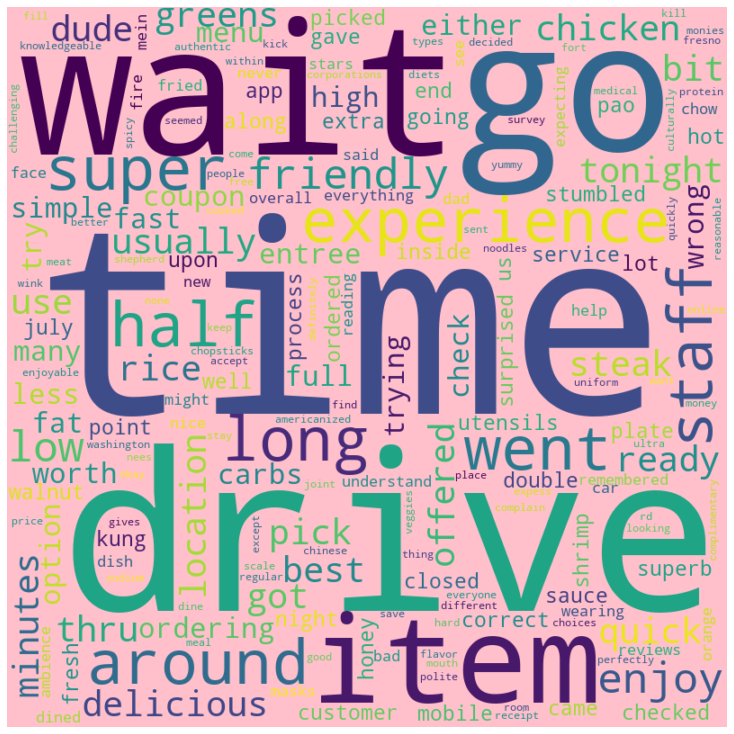

In [68]:
from PIL import Image
import numpy as np
plt.figure(figsize=[10, 10])
plt.imshow(final_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()